In [143]:
#Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn import preprocessing

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error   
import pickle

import warnings
warnings.filterwarnings('ignore')

In [157]:
df = pd.read_csv('/Users/da_m1_36/Documents/insuranceses.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27,0,1,3,16884
1,18,1,33,1,0,2,1725
2,28,1,33,3,0,2,4449
3,33,1,22,0,0,1,21984
4,32,1,28,0,0,1,3866
...,...,...,...,...,...,...,...
1332,50,1,30,3,0,1,10600
1333,18,0,31,0,0,0,2205
1334,18,0,36,0,0,2,1629
1335,21,0,25,0,0,3,2007


In [61]:
# Changing data types
df.charges = df['charges'].astype(int)

df.bmi = df['bmi'].astype(int)

In [62]:
df.to_csv('insuranceses.csv', index=False)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### EDA

In [54]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### DATA CLEANING

In [55]:
df.duplicated().sum()

1

In [56]:
df = df.drop_duplicates()

In [98]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [90]:
selected_column = df.loc[(df['age'] == 50) & (df['bmi'] == 25) & (df['children'] == 2) & (df['smoker'] == 1) & (df['region'] == 2), 'charges']


In [ ]:
selected_column

In [10]:
df['region'].unique()

array([3, 2, 1, 0])

### ENCODE

In [60]:
df['sex'].unique()

array([0, 1])

In [59]:
df['smoker'].unique()

array([1, 0])

In [58]:
df['region'].unique()

array([3, 2, 1, 0])

In [57]:
label_encoder = preprocessing.LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['region'] = label_encoder.fit_transform(df['region'])
df['smoker' ]= label_encoder.fit_transform(df['smoker'])

### CHECK FOR OUTLIERS

In [67]:
df.skew()

age         0.054781
sex        -0.019469
bmi         0.281959
children    0.262813
smoker      1.463601
region     -0.039068
charges    -0.089988
dtype: float64

<Axes: ylabel='Density'>

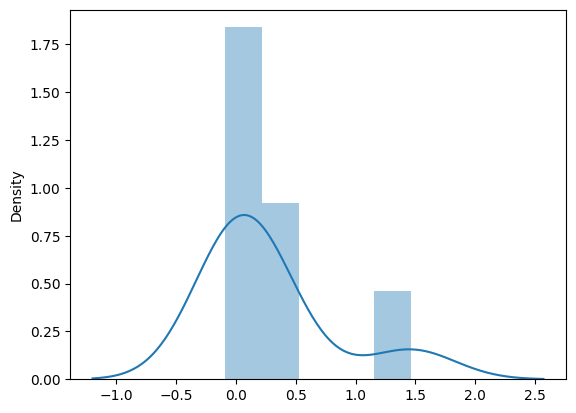

In [68]:
#skew gragh
sk = df.skew()
sns.distplot(sk)

In [65]:
# DEAL WITH OUTLIERS
#Log Transformation
df['charges']= np.log(df['charges'])

In [66]:
constant = 1  # Choose an appropriate constant
df['children'] = df['children'] + constant

# Apply log transformation
df['children'] = np.log(df['children'])

In [ ]:
# from scipy import stats

# transformed_data, best_lambda = stats.boxcox(df['smoker'])
# df['smoker'] = transformed_data

In [69]:
df.kurtosis()

age        -1.244406
sex        -2.002619
bmi        -0.055994
children   -1.343351
smoker      0.142339
region     -1.328392
charges    -0.634461
dtype: float64

<Axes: ylabel='Density'>

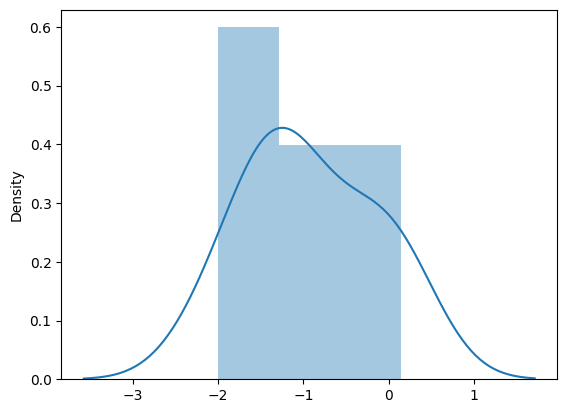

In [70]:
kt = df.kurtosis()
sns.distplot(kt)

### ANALYSIS

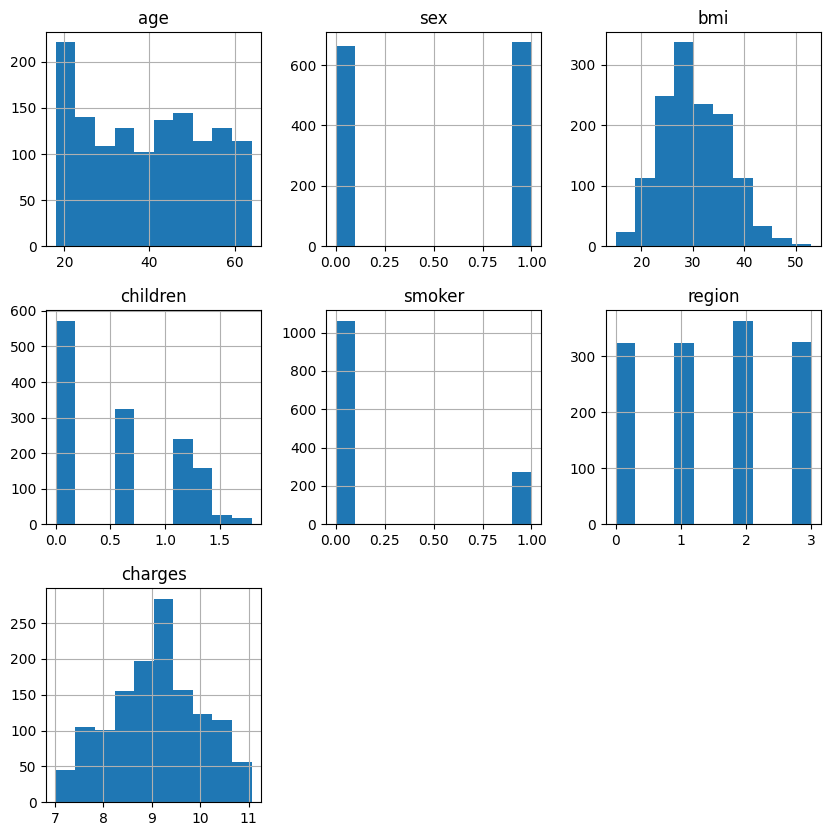

In [71]:
features = ['age','sex','bmi','children','smoker', 'region', 'charges'] # create a list of all numerical features
df[features].hist(figsize=(10,10));

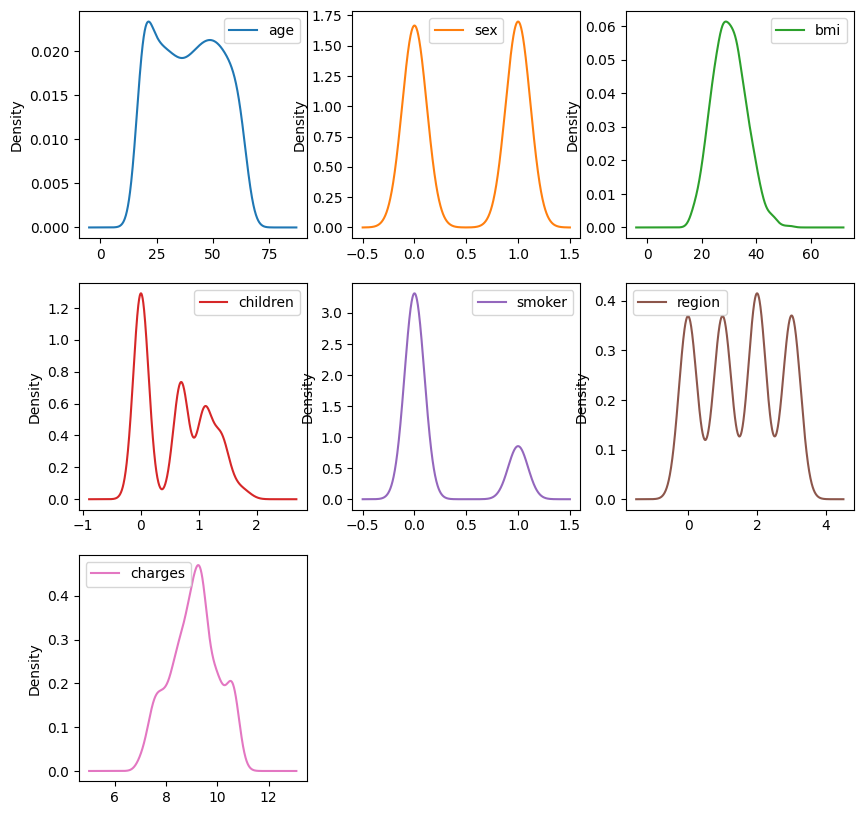

In [72]:
df[features].plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(10, 10));

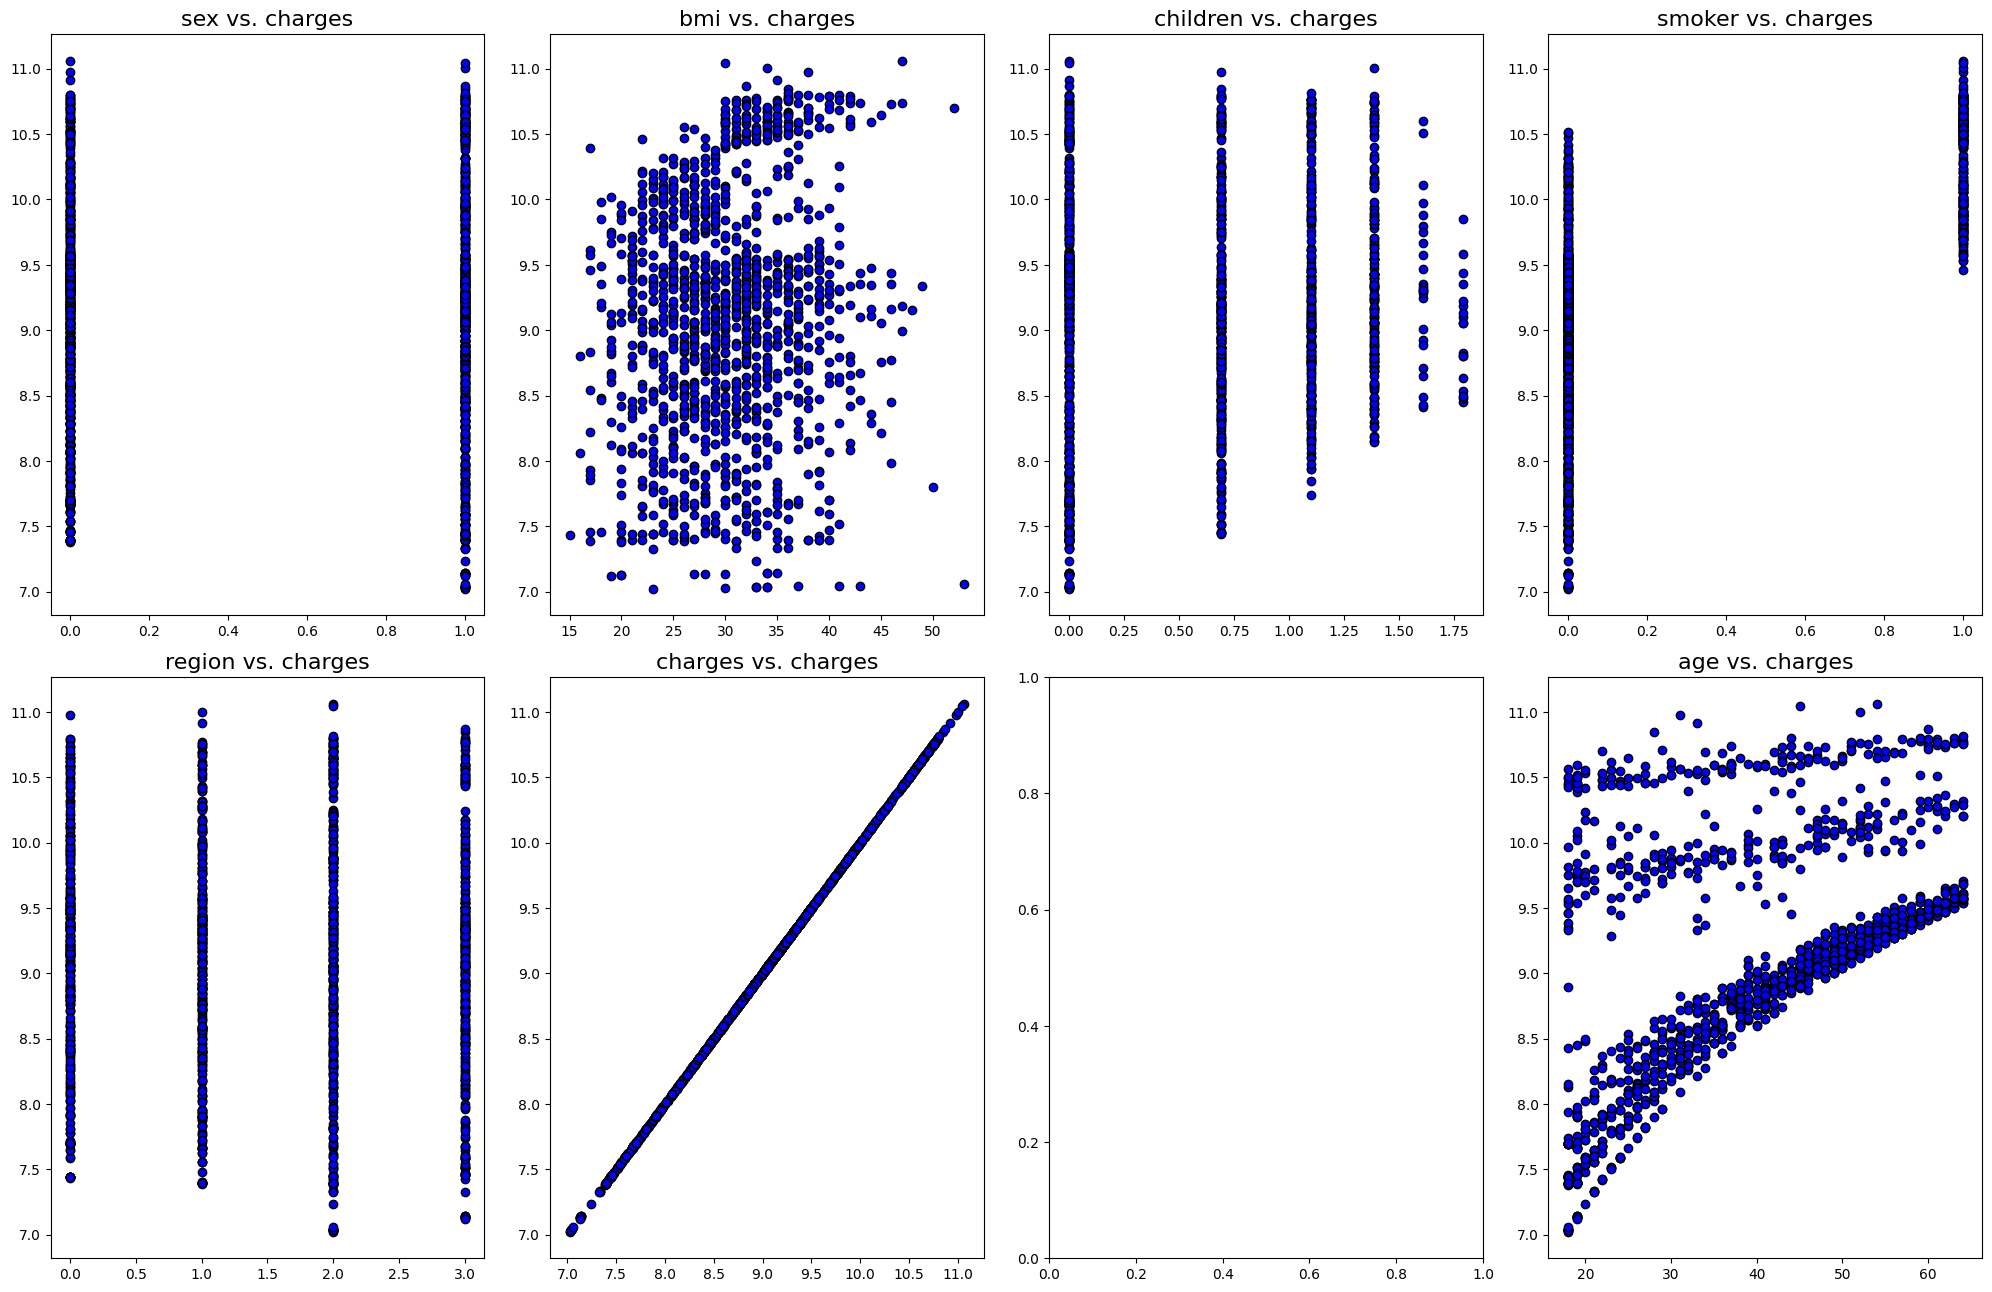

In [73]:
fig, axs = plt.subplots(2,4, figsize=(20,13),)
fig.subplots_adjust(hspace = 0.8, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs. charges".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['charges'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

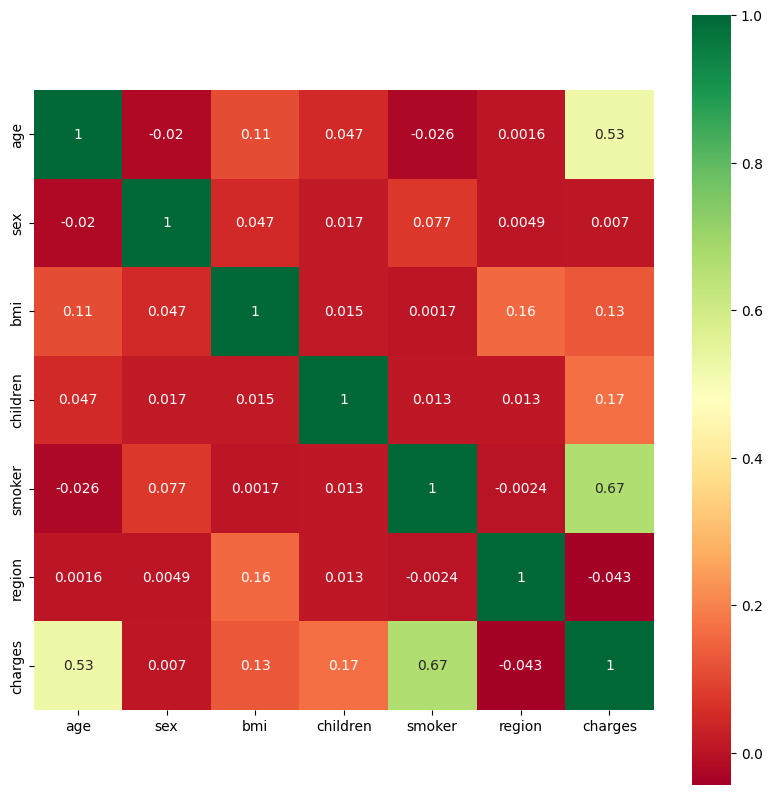

In [74]:
plt.figure(figsize=(10,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

### FEARTURE SELECTION

In [82]:
df = pd.DataFrame(df)

features = ['age','smoker']
target = 'charges'
X = df[features]
Y = df[target]

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

### TRAINING

In [135]:
x = df.drop(['charges', 'sex', 'bmi'], axis =1)
y = df.charges

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (935, 4)
x_test shape:  (402, 4)
y_train shape:  (935,)
y_test shape:  (402,)


In [149]:
RidgeR = Ridge(alpha=1.0)
LinearR = LinearRegression()
Adab = AdaBoostRegressor()

listr = [RidgeR, LinearR, Adab]

for model in listr:
    model.fit(x_train, y_train)

    test_predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, test_predictions)
    r2 = r2_score(y_test, test_predictions)

    print(f"Model: {type(model).__name__}")
    print(f"Testing Mean Squared Error: {mse}")
    print(f"Testing R-squared: {r2}")

    train_predictions = model.predict(x_train)
    mse = mean_squared_error(y_train, train_predictions)
    r2 = r2_score(y_train, train_predictions)

    print(f"Model: {type(model).__name__}")
    print(f"Training Mean Squared Error: {mse}")
    print(f"Training R-squared: {r2}\n")

Model: Ridge
Testing Mean Squared Error: 0.19011841004278035
Testing R-squared: 0.7839646072668832
Model: Ridge
Training Mean Squared Error: 0.20857704935672267
Training R-squared: 0.7479482279910759

Model: LinearRegression
Testing Mean Squared Error: 0.1899070207282343
Testing R-squared: 0.7842048132184124
Model: LinearRegression
Training Mean Squared Error: 0.20856097101218019
Training R-squared: 0.7479676576226936

Model: AdaBoostRegressor
Testing Mean Squared Error: 0.2262924653823369
Testing R-squared: 0.7428592968959827
Model: AdaBoostRegressor
Training Mean Squared Error: 0.22745691693162542
Training R-squared: 0.7251331383528608



In [150]:
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(n_estimators=100, random_state=0)
lasso = Lasso(alpha=1.0)
StackingR = StackingRegressor(estimators=[('rf', rf), ('dt', dt)])

listr = [dt, rf, lasso, StackingR]

for model in listr:
    model.fit(x_train, y_train)

    test_predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, test_predictions)
    r2 = r2_score(y_test, test_predictions)

    print(f"Model: {type(model).__name__}")
    print(f"Testing Mean Squared Error: {mse}")
    print(f"Testing R-squared: {r2}")

    train_predictions = model.predict(x_train)
    mse = mean_squared_error(y_train, train_predictions)
    r2 = r2_score(y_train, train_predictions)

    print(f"Model: {type(model).__name__}")
    print(f"Training Mean Squared Error: {mse}")
    print(f"Training R-squared: {r2}\n")

Model: DecisionTreeRegressor
Testing Mean Squared Error: 0.23370568975774392
Testing R-squared: 0.7344355001737222
Model: DecisionTreeRegressor
Training Mean Squared Error: 0.06364491746430709
Training R-squared: 0.9230892647311137

Model: RandomForestRegressor
Testing Mean Squared Error: 0.18352985781047707
Testing R-squared: 0.791451312361503
Model: RandomForestRegressor
Training Mean Squared Error: 0.07619794217234004
Training R-squared: 0.9079197524022659

Model: Lasso
Testing Mean Squared Error: 0.6211468589796028
Testing R-squared: 0.29417826714201367
Model: Lasso
Training Mean Squared Error: 0.6152599420962759
Training R-squared: 0.2564984540257327

Model: StackingRegressor
Testing Mean Squared Error: 0.18610764925548567
Testing R-squared: 0.7885221158303454
Model: StackingRegressor
Training Mean Squared Error: 0.08391970038916516
Training R-squared: 0.8985885107935758



In [155]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Create regressor object
linear_regression = LinearRegression()

# Model Fitting
linear_regression.fit(x_train, y_train)

# Test Predictions
lr_test_y_pred = linear_regression.predict(x_test)

# Test assessment
mse = mean_squared_error(y_test, lr_test_y_pred)
r2 = r2_score(y_test, lr_test_y_pred)

print(f"Testing Mean Squared Error: {mse}")
print(f"Testing R-squared: {r2}")

# Train Predictions
lr_train_y_pred = linear_regression.predict(x_train)

# Train assessment
mse = mean_squared_error(y_train, lr_train_y_pred)
r2 = r2_score(y_train, lr_train_y_pred)

print(f"Training Mean Squared Error: {mse}")
print(f"Training R-squared: {r2}")

Testing Mean Squared Error: 0.1899070207282343
Testing R-squared: 0.7842048132184124
Training Mean Squared Error: 0.20856097101218019
Training R-squared: 0.7479676576226936


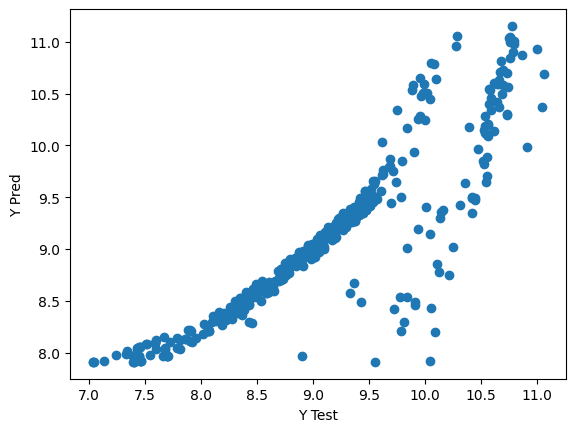

In [133]:
plt.scatter(y_test, pred)
plt.xlabel('Y Test')
plt.ylabel('Y Pred')
plt.show()

### PREDICTION

In [ ]:
print(np.exp(lr_train_y_pred))
print("\n", np.exp(y_train))

In [ ]:
print(np.exp(lr_test_y_pred))
print("\n", np.exp(y_test))

In [158]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27,0,1,3,16884
1,18,1,33,1,0,2,1725
2,28,1,33,3,0,2,4449
3,33,1,22,0,0,1,21984
4,32,1,28,0,0,1,3866
...,...,...,...,...,...,...,...
1332,50,1,30,3,0,1,10600
1333,18,0,31,0,0,0,2205
1334,18,0,36,0,0,2,1629
1335,21,0,25,0,0,3,2007
